In [17]:

# libraries 1
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [18]:
#csv 2 
df = pd.read_csv('project_dataset_100 (2).csv')
print(df.head())
print(len(df))
df.info()
print(df.isnull().sum())
num_duplicates = df.duplicated().sum()
print(num_duplicates)

   ProjectID ClarityOfObjectives PlanningDetail ResourceAvailability  \
0          1      Somewhat Clear       Detailed           Sufficient   
1          2      Somewhat Clear       Detailed           Sufficient   
2          3             Unclear            NaN           Sufficient   
3          4          Very Clear     High-Level    Barely Sufficient   
4          5      Somewhat Clear       Detailed           Sufficient   

  DeadlineRealism CommunicationFrequency StakeholderEngagement  \
0       Ambitious                  Daily        Highly Engaged   
1       Realistic           Infrequently            Disengaged   
2       Realistic           Infrequently    Moderately Engaged   
3       Realistic                  Daily        Highly Engaged   
4     Unrealistic                 Weekly    Moderately Engaged   

  RiskManagementPlan ScopeControlProcess PredictedOutcome       PrimaryReason  
0                 No                 Yes          Failure      Execution Risk  
1         

In [20]:

# 3. Feature and Target Preparation + Encoding
x = df.drop(['ProjectID', 'PrimaryReason', 'PredictedOutcome'], axis=1)
y = df['PredictedOutcome']

encoders = {}
x_encoded = x.copy()
for col in x.columns:
    if x_encoded[col].dtype == 'object':
        le = LabelEncoder()
        x_encoded[col] = le.fit_transform(x_encoded[col])
        encoders[col] = le

le_outcome = LabelEncoder()
y_encoded = le_outcome.fit_transform(y)
encoders['PredictedOutcome'] = le_outcome

In [21]:
# 4. Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.3, random_state=42)


print(f"\nData split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.\n")


Data split: 70 training samples, 30 test samples.



In [22]:
# 5.Overfit, Underfit, Good Fit

# Overfit Model
model_overfit = DecisionTreeClassifier(random_state=42)
model_overfit.fit(X_train, y_train)
y_pred_train_of = model_overfit.predict(X_train)
y_pred_test_of = model_overfit.predict(X_test)
train_acc_of = accuracy_score(y_train, y_pred_train_of)
test_acc_of = accuracy_score(y_test, y_pred_test_of)

# Underfit Model
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)
y_pred_train_uf = model_underfit.predict(X_train)
y_pred_test_uf = model_underfit.predict(X_test)
train_acc_uf = accuracy_score(y_train, y_pred_train_uf)
test_acc_uf = accuracy_score(y_test, y_pred_test_uf)

# Good Fit Model
model_good = DecisionTreeClassifier(max_depth=4, random_state=42)
model_good.fit(X_train, y_train)
y_pred_train_gf = model_good.predict(X_train)
y_pred_test_gf = model_good.predict(X_test)
train_acc_gf = accuracy_score(y_train, y_pred_train_gf)
test_acc_gf = accuracy_score(y_test, y_pred_test_gf)

In [23]:
# 6. Print Accuracy Scores and Summary
print("--- SCENARIO 1: OVERFITTING (High Variance) ---")
print(f"Training Accuracy: {train_acc_of:.2%}")
print(f"Testing Accuracy:  {test_acc_of:.2%}\n")

print("--- SCENARIO 2: UNDERFITTING (High Bias) ---")
print(f"Training Accuracy: {train_acc_uf:.2%}")
print(f"Testing Accuracy:  {test_acc_uf:.2%}\n")

print("--- SCENARIO 3: GOOD FIT (Balanced Model) ---")
print(f"Training Accuracy: {train_acc_gf:.2%}")
print(f"Testing Accuracy:  {test_acc_gf:.2%}\n")

--- SCENARIO 1: OVERFITTING (High Variance) ---
Training Accuracy: 100.00%
Testing Accuracy:  73.33%

--- SCENARIO 2: UNDERFITTING (High Bias) ---
Training Accuracy: 71.43%
Testing Accuracy:  73.33%

--- SCENARIO 3: GOOD FIT (Balanced Model) ---
Training Accuracy: 88.57%
Testing Accuracy:  70.00%



In [24]:
# 7.Classification Report (Good Fit Model only)
print("Classification Report for GOOD FIT Model (Test Data):")
print(classification_report(y_test, y_pred_test_gf, target_names=le_outcome.classes_))

Classification Report for GOOD FIT Model (Test Data):
              precision    recall  f1-score   support

     Failure       0.93      0.64      0.76        22
     Success       0.47      0.88      0.61         8

    accuracy                           0.70        30
   macro avg       0.70      0.76      0.68        30
weighted avg       0.81      0.70      0.72        30



<ipython-input-25-de19f0ba1a7d>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(le_outcome.classes_), rotation=45)
<ipython-input-25-de19f0ba1a7d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(le_outcome.classes_))


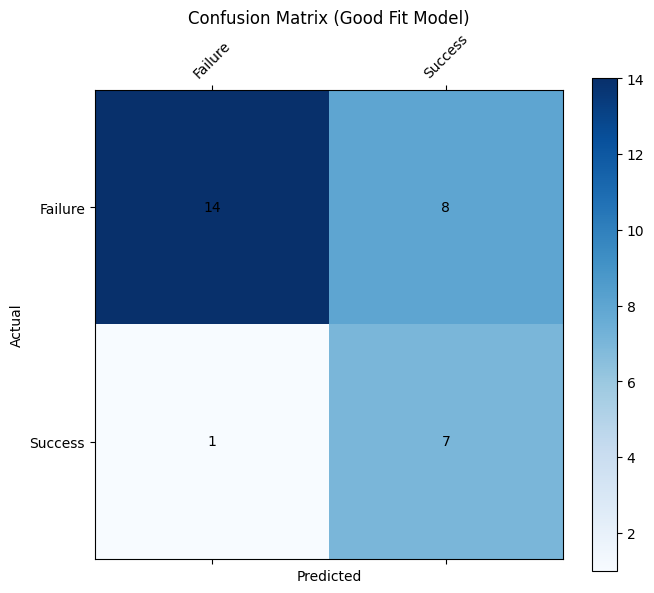

In [25]:
# 8. Confusion Matrix Plot (Good Fit Model) 
cm = confusion_matrix(y_test, y_pred_test_gf)
fig, ax = plt.subplots(figsize=(7,6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + list(le_outcome.classes_), rotation=45)
ax.set_yticklabels([''] + list(le_outcome.classes_))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Good Fit Model)')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

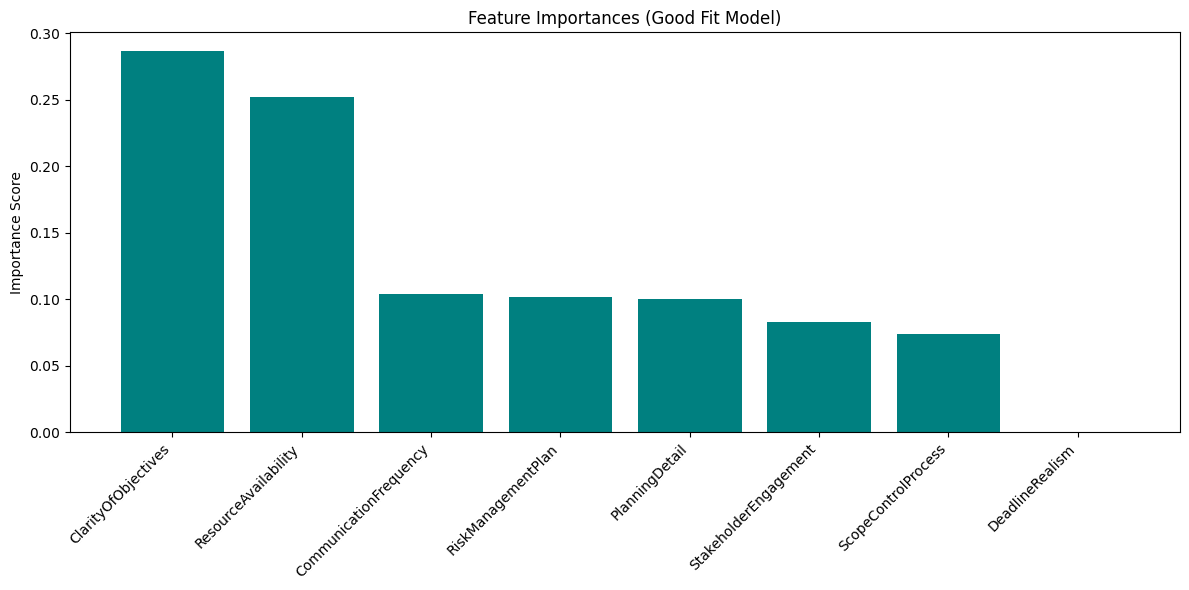

In [26]:
# 9. Feature Importance Bar Plot (Good Fit Model)
feature_importances = pd.Series(model_good.feature_importances_, index=x_encoded.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(feature_importances_sorted.index, feature_importances_sorted.values, color='teal')
plt.title('Feature Importances (Good Fit Model)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# 10. User Input Simulation Prediction with Risk Analysis
print("\n--- Enter Your Project Details ---")
user_input = {}
for col in x.columns:
    options = x[col].unique().tolist()
    print(f"\n--- {col} ---")
    for i, option in enumerate(options, 1):
        print(f"  {i}. {option}")
    while True:
        raw_choice = input("Enter the number for your choice: ")
        if raw_choice.isdigit():
            choice = int(raw_choice)
            if 1 <= choice <= len(options):
                user_input[col] = options[choice - 1]
                break
            else:
                print(f"Invalid number. Please enter between 1 and {len(options)}.")
        else:
            print("That's not a number. Please enter a valid number.")

encoded_input_list = []
for col in x.columns:
    if col in encoders:
        # FIXED: Convert input to string. This handles 'nan' or np.nan
        # which would cause the .transform() to fail.
        user_val_str = str(user_input[col])
        encoded_val = encoders[col].transform([user_val_str])[0]
        encoded_input_list.append(encoded_val)
    else:
        # This part will likely not run if all your features are objects,
        # but it's here just in case.
        encoded_input_list.append(user_input[col])

encoded_input = [encoded_input_list]

prediction_encoded = model_good.predict(encoded_input)
final_prediction = le_outcome.inverse_transform(prediction_encoded)[0]
probabilities = model_good.predict_proba(encoded_input)[0]

# FIXED: Added this block to define 'risk_percentage' before it's used.
# It finds the probability associated with "Failure".
try:
    failure_index = le_outcome.classes_.tolist().index('Failure')
    failure_probability = probabilities[failure_index]
    risk_percentage = failure_probability * 100
except ValueError:
    print("Warning: 'Failure' outcome not found. Risk analysis may be incorrect.")
    risk_percentage = 0 # Default to 0 risk if 'Failure' isn't a class

important_features = feature_importances.sort_values(ascending=False)
top_features = important_features.head(3).index.tolist()
lacking_features = [feat for feat in x.columns if feat not in top_features and feature_importances[feat] > 0]

print("\n--------------------------")
print(f"Predicted Outcome: {final_prediction}")
print(f"Confidence: {probabilities.max():.2%} (Risk of Failure: {risk_percentage:.2}%)")
print("--------------------------")

# FIXED: This entire if/else block was incorrectly indented and was missing
# the 'if risk_percentage > 50:' condition.
if risk_percentage > 50:
    print("⚠️ Your project has a HIGH risk factor.")
    if lacking_features:
        print("🔍 Based on feature analysis, your project might be lacking in:")
        for lf in lacking_features[:3]:
            print(f"  - {lf}")
    print("💡 Try improving these areas to reduce project risk.")
else:
    print("✅ Your project seems to be on track with LOW risk.")
    print("🎯 Keep maintaining the key areas:")
    for tf in top_features[:3]:
        print(f"  - {tf}")
print("--------------------------")

# 11. Bar Plot

user_df = pd.DataFrame({
    'Feature': x.columns,
    'Value': encoded_input_list
})

plt.figure(figsize=(10,6))
plt.bar(user_df['Feature'], user_df['Value'], color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.title('User Input Feature Values (Encoded)')
plt.ylabel('Encoded Value')
plt.tight_layout()
plt.show()


--- Enter Your Project Details ---

--- ClarityOfObjectives ---
  1. Somewhat Clear
  2. Unclear
  3. Very Clear


Enter the number for your choice:  1



--- PlanningDetail ---
  1. Detailed
  2. nan
  3. High-Level


Enter the number for your choice:  2



--- ResourceAvailability ---
  1. Sufficient
  2. Barely Sufficient
  3. Insufficient


Enter the number for your choice:  1



--- DeadlineRealism ---
  1. Ambitious
  2. Realistic
  3. Unrealistic


Enter the number for your choice:  2



--- CommunicationFrequency ---
  1. Daily
  2. Infrequently
  3. Weekly


Enter the number for your choice:  1



--- StakeholderEngagement ---
  1. Highly Engaged
  2. Disengaged
  3. Moderately Engaged


Enter the number for your choice:  2



--- RiskManagementPlan ---
  1. No
  2. Yes


Enter the number for your choice:  1



--- ScopeControlProcess ---
  1. Yes
  2. No


Enter the number for your choice:  2


<class 'ValueError'>: y contains previously unseen labels: 'nan'